In [3]:
#used for manipulating directory paths
import os

#scientific and vector computation in python
import numpy as np

#Plotting library
from matplotlib import pyplot
#to plot 3D plots
from mpl_toolkits.mplot3d import Axes3D

#tells matplotlib to include graphs within the notebook
%matplotlib inline

# to read csv files
import pandas as pd

In [5]:
#loading data from AppleStore.csv file
data = pd.read_csv(os.path.join("data","AppleStore.csv"))
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
'''modifying column `prime genre` such that
1 - Games
2 - Entertainment
3 - Education
4 - Social Networking
5 - Others
''' 
print(data.shape)
#idx stores index of rows that has `Games` as their `prime Genre`

idx = np.argwhere(data.iloc[:,12]=="Games")
#updating values at 'prime Genre'
data.iloc[idx,12]= 1


idx = np.argwhere(data.iloc[:,12]=="Entertainment")
data.iloc[idx,12]= 2

idx = np.argwhere(data.iloc[:,12]=="Education")
data.iloc[idx,12]= 3

idx = np.argwhere(data.iloc[:,12]=="Social Networking")
data.iloc[idx,12]= 4
idx = np.argwhere((data.iloc[:,12]!=1) & (data.iloc[:,12]!=2) & (data.iloc[:,12]!=3) & (data.iloc[:,12]!=4))
data.iloc[idx,12]= 5

data.head()
#X = np.concatenate(data.iloc[:,5],data.iloc[:,12])

(7197, 17)


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,1,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,5,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,5,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,5,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,5,37,5,45,1


(7197, 2)
(7197,)


Text(0, 0.5, 'ratings (0-5)')

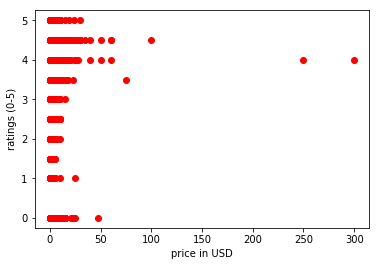

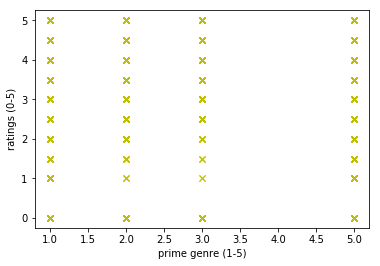

In [46]:
X = data.iloc[:,5]
X = np.vstack([X,data.iloc[:,12]])
X = X.T
'''X is a (data.shape[0] X 1) array storing price in 1st column and prime genre in 2nd column
Y stores user rating
'''
Y = data.iloc[:,8]   
print(X.shape)
print(Y.shape)
pyplot.plot(X[:,0],Y,"ro")
pyplot.xlabel("price in USD")
pyplot.ylabel("ratings (0-5)")
pyplot.figure()
pyplot.plot(X[:,1],Y,"yx")
pyplot.xlabel("prime genre (1-5)")
pyplot.ylabel("ratings (0-5)")